In [1]:
#Brittany Roberts
#DSC410
#Exercise 7.2

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/bellevue-university/dsc410/main/12%20Week/week_7/eda_classification.csv')
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,Apr,-25.561679,28.188776,1.150223,-1.887983,-10.482834,"($1,481.74)",203.758763,28.032961,-13.506947,0.00%,2.840758,volkswagon,thurday,-30.167906,0.979618,small,1
9995,41.257961,May,-0.264639,11.293025,-5.768300,4.088754,0.300116,$417.34,81.247235,32.269791,20.841980,0.00%,-2.268718,bmw,wed,-7.595250,0.269051,small,1
9996,11.431402,May,-28.363664,-35.619430,10.238941,6.494562,-0.407489,"($1,937.19)",68.974245,-12.463081,3.114821,-0.02%,-5.195810,Honda,wednesday,9.583622,1.684282,small,1
9997,-19.039869,Aug,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,"($1,472.62)",82.525340,18.593754,-67.440846,-0.01%,6.179807,bmw,friday,3.873697,-0.525457,small,0


In [2]:
df['x7'] = df['x7'].astype(str).str.replace('[(,),$,%]', '',regex=True)
df['x11'] = df['x11'].astype(str).str.replace('[(,),$,%]', '',regex=True)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x15', 'x16', 'y']
categorical_features = ['x1', 'x13', 'x14', 'x17', 'y']

In [4]:
df['x7'] = df['x7'].astype(float)
df['x11'] = df['x11'].astype(float)
df.describe()

,x0,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x15,x16,y
count,9996.000000,9995.000000,9996.000000,9997.000000,9997.000000,9999.000000,9996.000000,9998.000000,9999.000000,9996.000000,9997.000000,9995.000000,9999.000000,9998.000000,9999.000000
mean,6.501091,-3.729880,-7.335819,-0.001323,1.347141,1.214413,797.387806,-4.239862,-0.297257,-22.482050,-0.000041,0.034517,-0.222981,-0.430020,0.491949
std,29.140034,17.237178,38.355015,3.995307,9.606695,17.352962,602.690880,131.921984,37.987287,91.723733,0.010415,6.065264,14.679529,2.825224,0.499960
min,-106.809919,-65.137848,-150.846091,-14.616540,-37.499530,-59.900503,0.030000,-661.764937,-142.719688,-427.412374,-0.040000,-25.024464,-57.315771,-12.527505,0.000000
25%,-13.094564,-15.356197,-33.079854,-2.681308,-5.047927,-10.904697,320.825000,-91.489340,-25.685742,-79.734745,-0.010000,-4.191568,-10.312554,-2.346461,0.000000
50%,6.659263,-3.825630,-7.374468,0.010637,1.217076,0.814006,671.850000,-4.744892,-0.239779,-20.459860,0.000000,0.154775,-0.633445,-0.415075,0.000000
75%,26.214107,7.764036,18.477979,2.635699,7.807128,12.693538,1153.075000,83.831778,25.459537,38.383398,0.010000,4.136013,9.504719,1.448256,1.000000
max,114.823451,67.685933,127.204103,16.923269,38.624213,68.865261,4496.460000,476.910533,181.063340,319.592518,0.040000,21.540626,57.918619,8.987513,1.000000


In [5]:
#EDA for numerical data

def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    df[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(df[feature_name].describe().round(2).astype(str)), size=17)

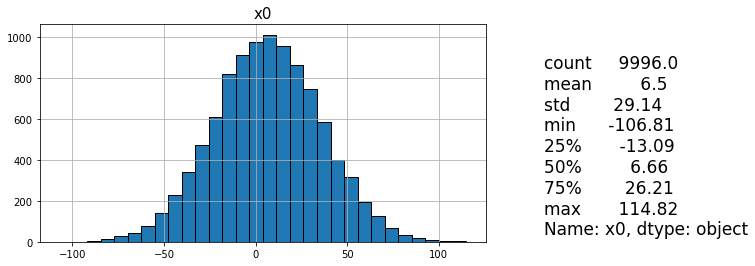

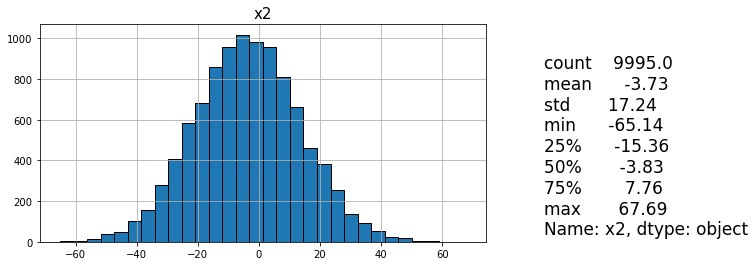

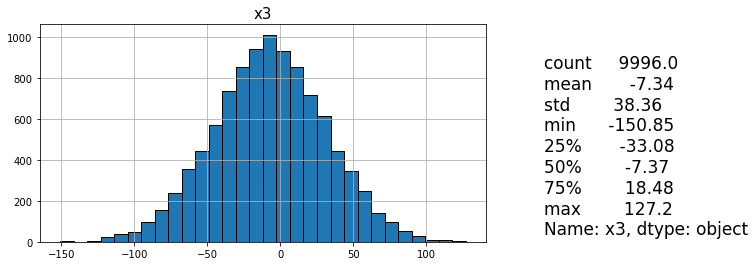

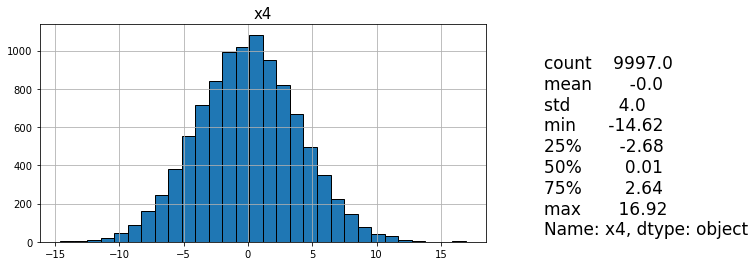

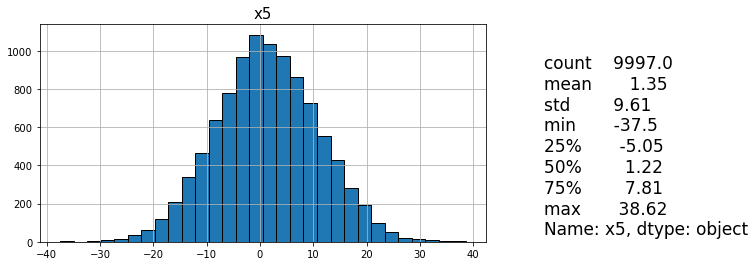

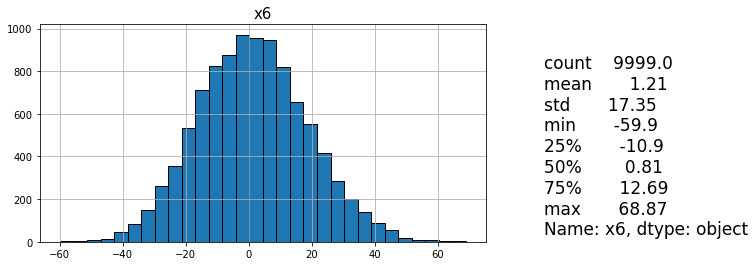

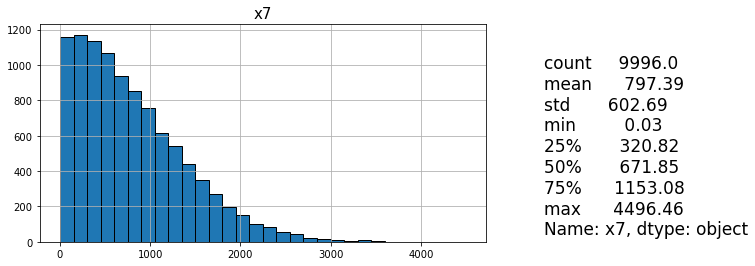

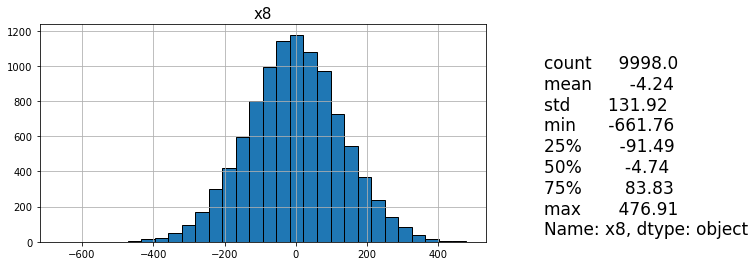

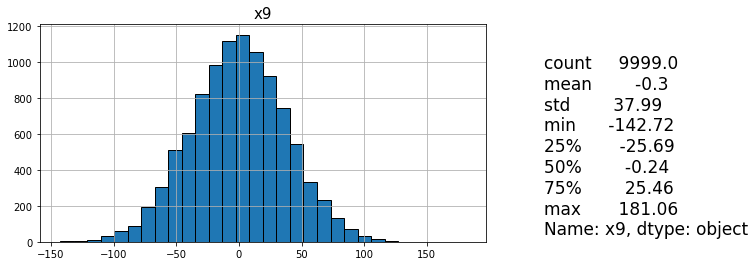

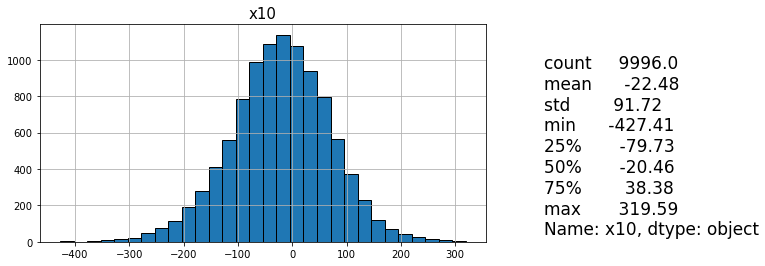

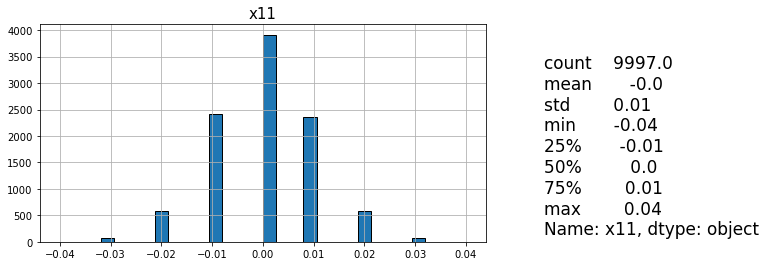

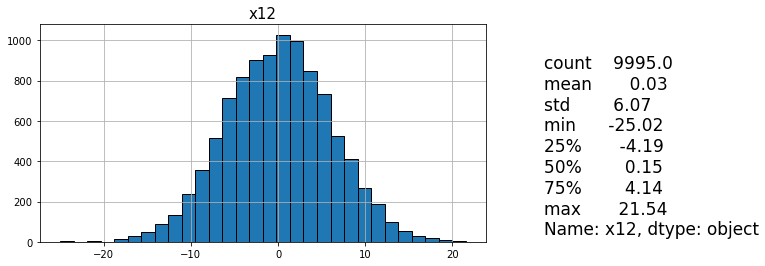

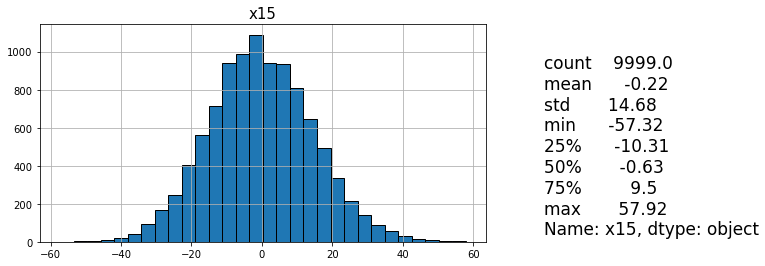

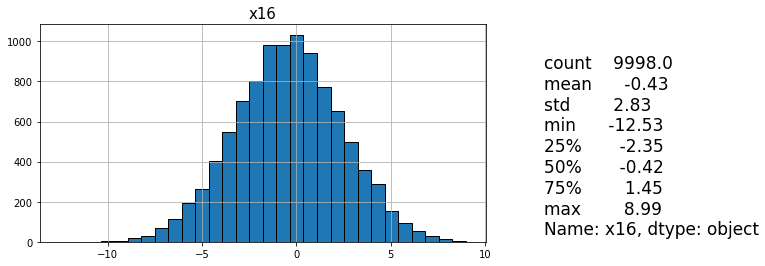

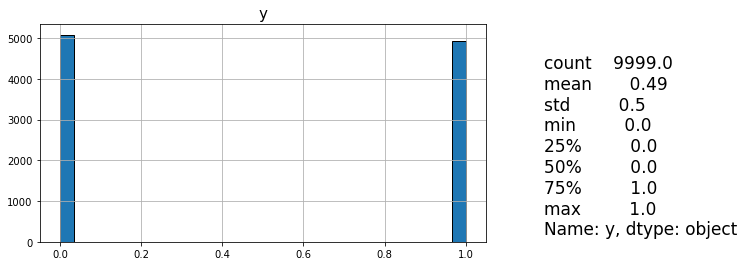

In [6]:
for x in numerical_features:
    desc_num_feature(x)

         count  percent
July      2709     27.1
Jun       2357     23.6
Aug       2059     20.6
May       1144     11.4
sept.      912      9.1
Apr        413      4.1
Oct        246      2.5
Mar        116      1.2
Nov         27      0.3
Feb         10      0.1
Dev          5      0.1
January      1      0.0


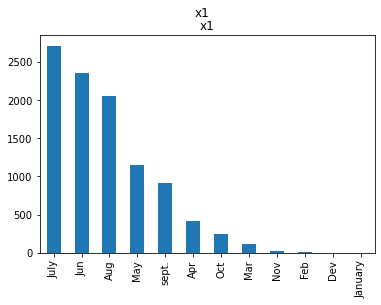

In [7]:
#EDA for categorical data

feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'count' :count, 'percent' :percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, subplots=True);

            count  percent
volkswagon   3132     31.3
Toyota       2773     27.7
bmw          1837     18.4
Honda        1277     12.8
tesla         545      5.5
chrystler     291      2.9
nissan         90      0.9
ford           39      0.4
mercades       11      0.1
chevrolet       3      0.0


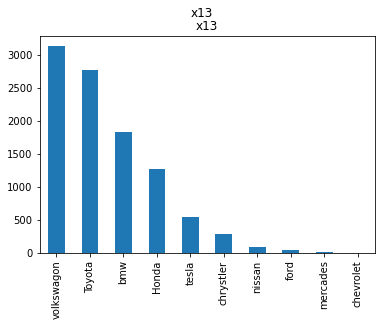

In [8]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'count' :count, 'percent' :percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, subplots=True);

           count  percent
wed         3709     37.1
thurday     3336     33.4
wednesday   1489     14.9
thur        1097     11.0
tuesday      214      2.1
friday       130      1.3
monday        15      0.2
fri            7      0.1


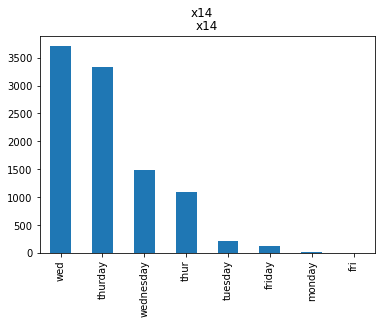

In [9]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'count' :count, 'percent' :percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, subplots=True);

        count  percent
small    8849     88.5
medium    783      7.8
large     367      3.7


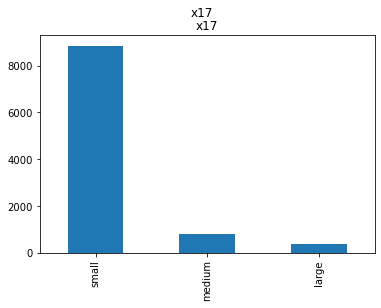

In [10]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'count' :count, 'percent' :percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, subplots=True);

   count  percent
0   5080     50.8
1   4919     49.2


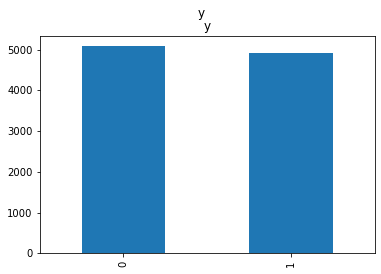

In [11]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'count' :count, 'percent' :percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, subplots=True);

In [12]:
#Correlation of numerical features with y

df[numerical_features].corr()

,x0,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x15,x16,y
x0,1.000000,-0.219569,-0.147841,0.001725,-0.190191,-0.037337,0.006825,-0.362803,0.087414,-0.116586,-0.218388,-0.001615,-0.125526,-0.058138,-0.004454
x2,-0.219569,1.000000,-0.024894,0.002963,-0.115697,0.144764,0.032653,-0.216378,0.078245,0.070796,-0.003526,0.002412,0.144808,0.100962,-0.000975
x3,-0.147841,-0.024894,1.000000,0.016473,-0.152140,0.121463,-0.020887,0.130809,0.026149,0.076399,0.081116,0.002097,-0.183583,0.079056,0.004600
x4,0.001725,0.002963,0.016473,1.000000,-0.005837,-0.000729,-0.008527,-0.016484,-0.022474,0.002219,-0.026202,0.009156,0.004372,0.004896,-0.003939
x5,-0.190191,-0.115697,-0.152140,-0.005837,1.000000,-0.038982,-0.030372,0.059076,-0.094444,-0.097260,-0.011600,0.001803,0.121232,-0.030424,-0.004438
x6,-0.037337,0.144764,0.121463,-0.000729,-0.038982,1.000000,0.005279,-0.089647,0.109608,-0.186171,0.041242,0.004956,-0.018823,0.127856,0.002482
x7,0.006825,0.032653,-0.020887,-0.008527,-0.030372,0.005279,1.000000,-0.022850,0.026020,-0.023304,-0.021675,-0.018393,0.014042,0.006967,0.004859
x8,-0.362803,-0.216378,0.130809,-0.016484,0.059076,-0.089647,-0.022850,1.000000,0.062623,0.086901,0.165896,-0.011249,0.000520,0.148375,-0.014472
x9,0.087414,0.078245,0.026149,-0.022474,-0.094444,0.109608,0.026020,0.062623,1.000000,-0.014459,0.165575,-0.006496,-0.144371,0.037877,0.000476
x10,-0.116586,0.070796,0.076399,0.002219,-0.097260,-0.186171,-0.023304,0.086901,-0.014459,1.000000,0.086639,0.006954,0.054775,-0.323785,0.015393


In [13]:
#Crosstabs for categorical features with y

pd.crosstab(df['x1'], df['y'])

y,0,1
x1,,
Apr,213,200
Aug,1073,986
Dev,2,3
Feb,4,6
January,0,1
July,1379,1330
Jun,1184,1173
Mar,61,55
May,571,573


In [14]:
pd.crosstab(df['x13'], df['y'])

y,0,1
x13,,
Honda,641,636
Toyota,1466,1307
bmw,925,912
chevrolet,1,2
chrystler,138,153
ford,22,17
mercades,4,7
nissan,48,42
tesla,274,271


In [15]:
pd.crosstab(df['x14'], df['y'])

y,0,1
x14,,
fri,7,0
friday,70,60
monday,7,8
thur,539,558
thurday,1678,1658
tuesday,107,107
wed,1906,1803
wednesday,766,723


In [16]:
pd.crosstab(df['x17'], df['y'])

y,0,1
x17,,
large,188,179
medium,393,390
small,4499,4350


In [17]:
#Binary features for categorical features
#x1 column
df['January'] = (df['x1'] == 1).astype('int')
df['Feb'] = (df['x1'] == 2).astype('int')
df['Mar'] = (df['x1'] == 3).astype('int')
df['Apr'] = (df['x1'] == 4).astype('int')
df['May'] = (df['x1'] == 5).astype('int')
df['Jun'] = (df['x1'] == 6).astype('int')
df['July'] = (df['x1'] == 7).astype('int')
df['Aug'] = (df['x1'] ==8).astype('int')
df['sept.'] = (df['x1'] == 9).astype('int')
df['Oct'] = (df['x1'] == 10).astype('int')
df['Nov'] = (df['x1'] == 11).astype('int')
df['Dev'] = (df['x1'] == 12).astype('int')

#x13 column
df['Honda'] = (df['x13'] == 1).astype('int')
df['Toyota'] = (df['x13'] == 2).astype('int')
df['bmw'] = (df['x13'] == 3).astype('int')
df['chevrolet'] = (df['x13'] == 4).astype('int')
df['chrystler'] = (df['x13'] ==5).astype('int')
df['ford'] = (df['x13'] ==6).astype('int')
df['mercades'] = (df['x13'] == 7).astype('int')
df['nissan'] = (df['x13'] == 8).astype('int')
df['tesla'] = (df['x13'] == 9).astype('int')
df['volkswageen'] = (df['x13'] == 10).astype('int')

#x14 column - making thur & thursday, fri & friday and wed & wednesday the same value as they represent the same day
df['fri'] = (df['x14'] == 5).astype('int')
df['friday'] = (df['x14'] == 5).astype('int')
df['monday'] = (df['x14'] ==1).astype('int')
df['thur'] = (df['x14'] == 4).astype('int')
df['thursday'] = (df['x14'] == 4).astype('int')
df['tuesday'] = (df['x14'] == 2).astype('int')
df['wed'] = (df['x14'] == 3).astype('int')
df['wednesday'] = (df['x14'] == 3).astype('int')

#x17 column
df['large'] = (df['x17'] == 3).astype('int')
df['medium'] = (df['x17'] == 2).astype('int')
df['small'] = (df['x17'] == 1).astype('int')

In [18]:
#logistic model set up

binary_features = ['x1', 'x13', 'x14', 'x17']
numerical_features = ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x15', 'x16']
X = df[numerical_features +  binary_features]
y = df['y'].astype(int)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [20]:
#standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [21]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1e6)
log_reg.fit(X_train, y_train)

#I don't know why it is not converting the May.  I tried it with spaces before and after the word but nothing is coming up.

ValueError: could not convert string to float: 'May'

In [ ]:
prob_log_reg = log_reg.predict_proba(X_train)
prob_log_reg[:10]

In [ ]:
y_pred_log_reg = log_reg.predict(X_train)
y_pred_log_reg[:10]

In [ ]:
np.all(y_pred_log_reg == (prob_log_reg[:, 1] > 0.5))

In [ ]:
pd.Series(data = log_reg.coef_[0],
          index=X_train.columns).sort_values(ascending=False).round(2)

In [ ]:
#Performance metrics

from sklearn.metrics import accuracy_score

accuracy_log_reg = accuracy_score(y_true=y_train, y_pred=y_pred_log_reg)
accuracy_log_reg